### Visualization of the cmip6 data in hma.
take air tempreture as example


In [1]:
import os
from glob import glob
import numpy as np
import xarray as xr
import geopandas as gpd
import rioxarray
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
path_hma_gtng = 'data/hma-extent/HMA/gtng_202307_hma_subregions.gpkg'
experiments = ['historical', 'ssp126', 'ssp245', 'ssp585']
path_cmip6_nc = glob('data/climate/cmip6/*/tas*.nc')
proj = ccrs.PlateCarree()


In [3]:
cmip6_xds = xr.open_dataset(path_cmip6_nc[0])
hma_gdf = gpd.read_file(path_hma_gtng)
hma_geo = hma_gdf.geometry.union_all()
hma_gdf = gpd.GeoDataFrame(geometry=[hma_geo], crs=hma_gdf.crs)


#### 1. Show the spatially distributed tempreture in hma region.

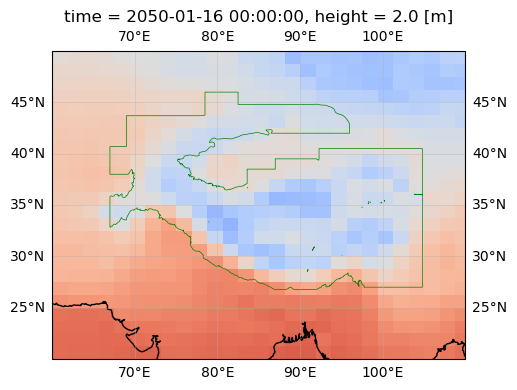

In [ ]:
### show the data in global and hma region
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'projection': proj})
ax.set_extent([60, 110, 20, 50], crs=proj)  ## HMA region
ax.add_feature(cfeat.COASTLINE)   ## 
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
cmip6_xds['tas'][420].plot(ax=ax,add_colorbar=False, cmap='coolwarm')
hma_gdf.plot(ax=ax, facecolor='none', edgecolor='green', linewidth=0.5)
# fig.savefig('figures/climate/cmip6_hma_tas_map_205001.png')


#### 2. Show the aggregated tempreture in hma region.

In [3]:
cmip6_hma_xds = xr.open_mfdataset('data/climate/cmip6/*/cmip6_agg*.nc')
cmip6_hma_xds.load()       ## convert Dask arrays into in-memory arrays
cmip6_hma_tas_xda = cmip6_hma_xds['tas']


In [9]:
data_90 = cmip6_hma_tas_xda.quantile(0.9, dim='model')
data_10 = cmip6_hma_tas_xda.quantile(0.1, dim='model')
data_50 = cmip6_hma_tas_xda.quantile(0.5, dim='model')


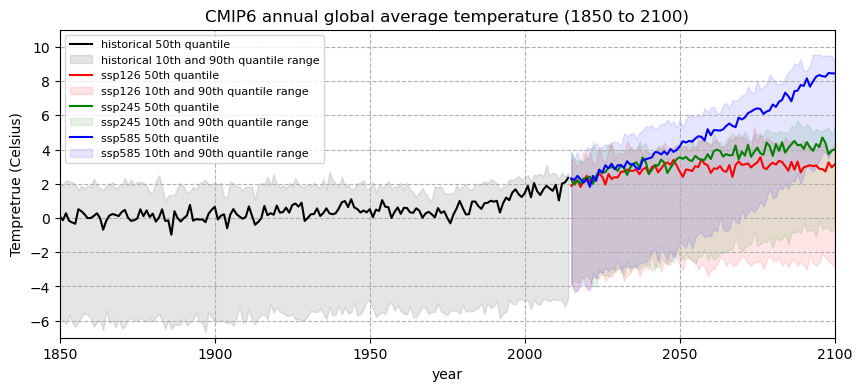

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10, 4))
colours = ['black','red','green','blue']
for i, _ in enumerate(experiments):
    ax.plot(data_50.year, data_50[i,:], color=f'{colours[i]}', 
            label=f'{data_50.experiment[i].values} 50th quantile')
    ax.fill_between(data_50.year, data_90[i,:], data_10[i,:], alpha=0.1, color=f'{colours[i]}', 
            label=f'{data_50.experiment[i].values} 10th and 90th quantile range')
ax.set_xlim(1850, 2100)
ax.set_ylim(-7, 11)
ax.set_title('CMIP6 annual global average temperature (1850 to 2100)')
ax.set_ylabel('Tempretrue (Celsius)')
ax.set_xlabel('year')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=8)
ax.grid(linestyle='--')
# fig.savefig('figures/climate/cmip6_hma_annual_tas.png')

